# Final Project 4 CLustering

#### 1. Import Library
#### 2. Baca dan analisis data
#### 3. Missing Value Analysis
#### 4. Data Visualization
        4.1 Histogram
        4.2 Boxplot
        4.3 Heatmap
#### 5. Data Preparation
#### 6. K-Means Clustering
#### 7. PCA
#### 8. Exploratory Data Analysis

## Import Library

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA


## Baca dan analisis data

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [19]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.282473   
std                  0.200121          6.824647      24.857649   3638.646702   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [21]:
df.shape

(8950, 17)

## 3 Missing Values Analysis

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [6]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

## 4. Data Visualization

#### 4.1 Histogram

In [7]:
df.drop(['CUST_ID'], axis=1, inplace=True)

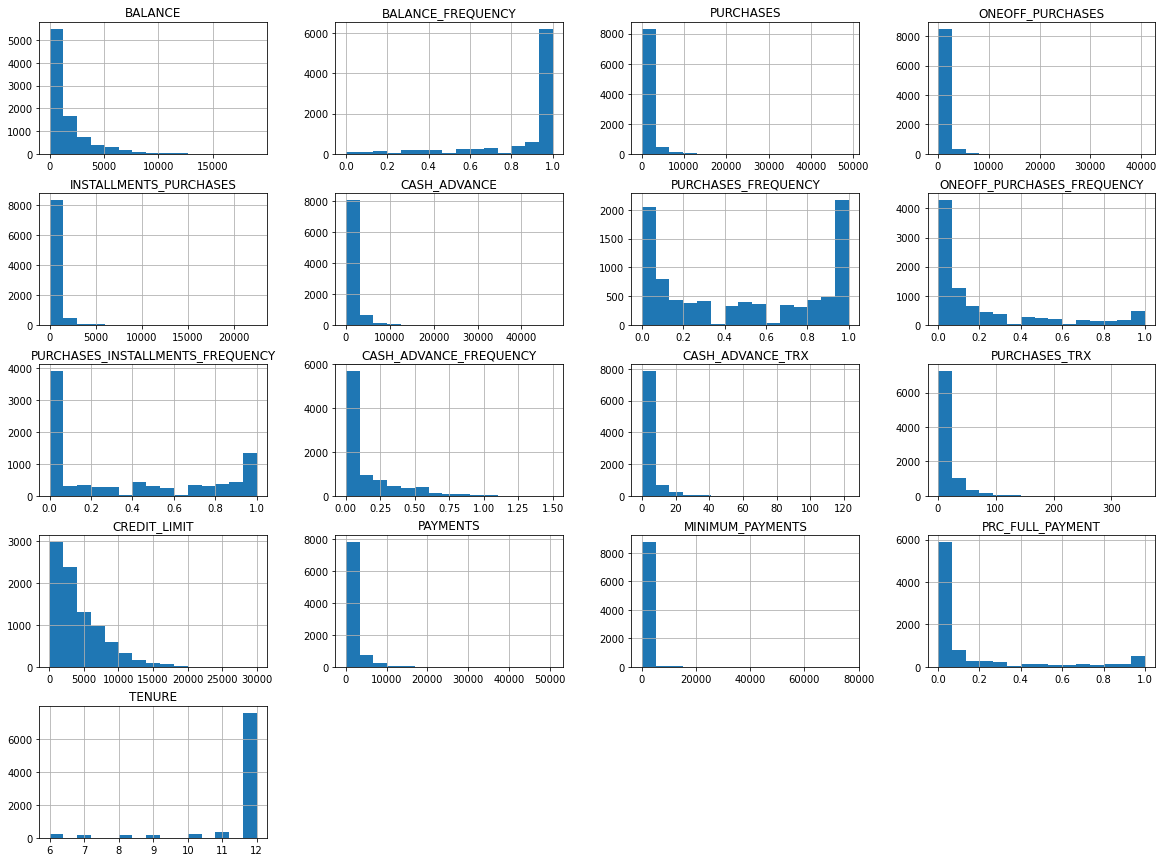

In [22]:
df.hist(bins=15, figsize=(20, 15), layout=(5, 4));

#### 4.2 Boxplot

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


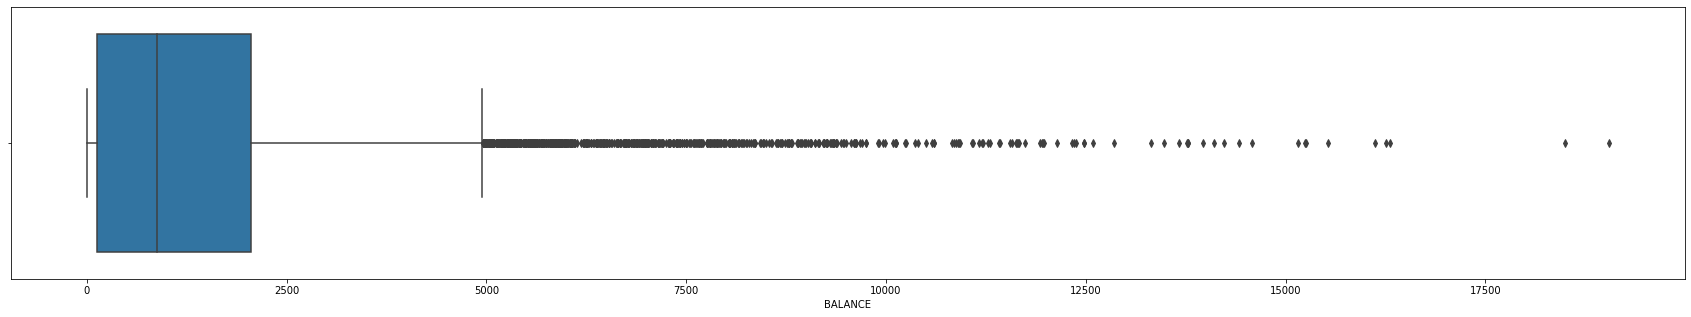

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


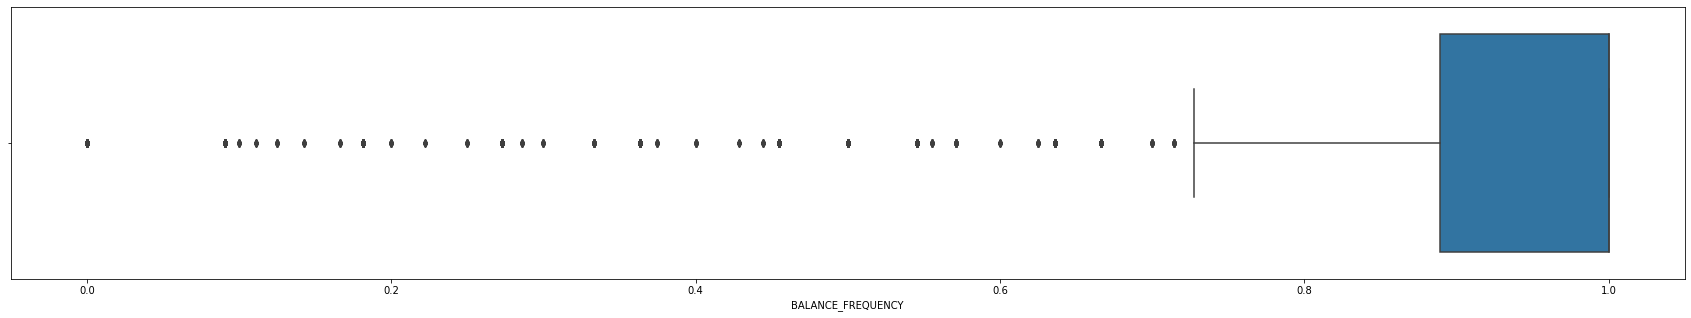

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


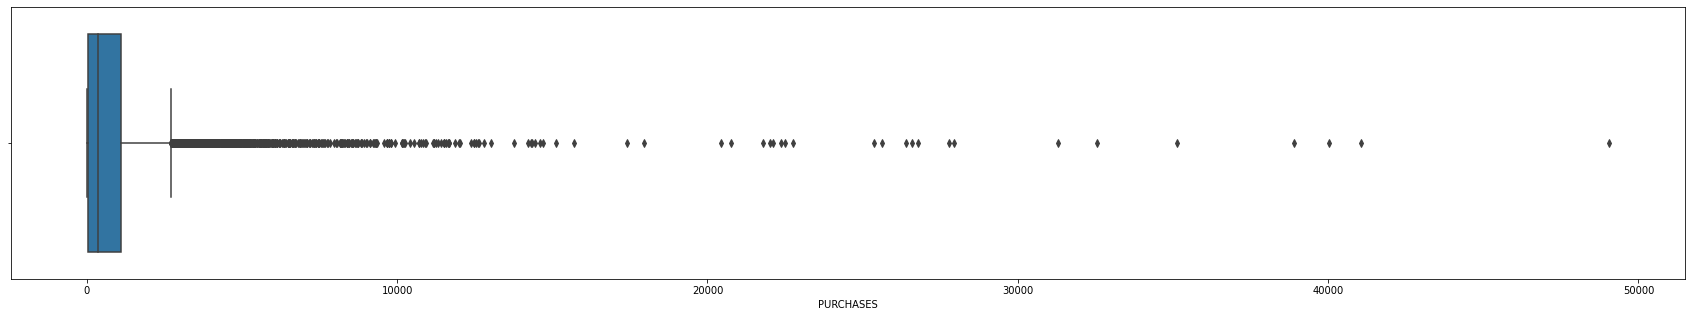

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


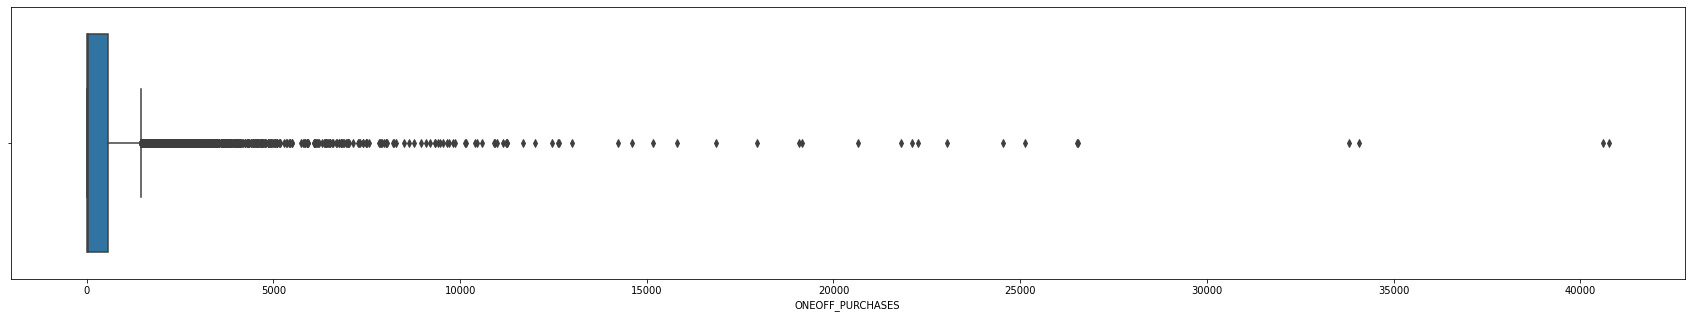

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


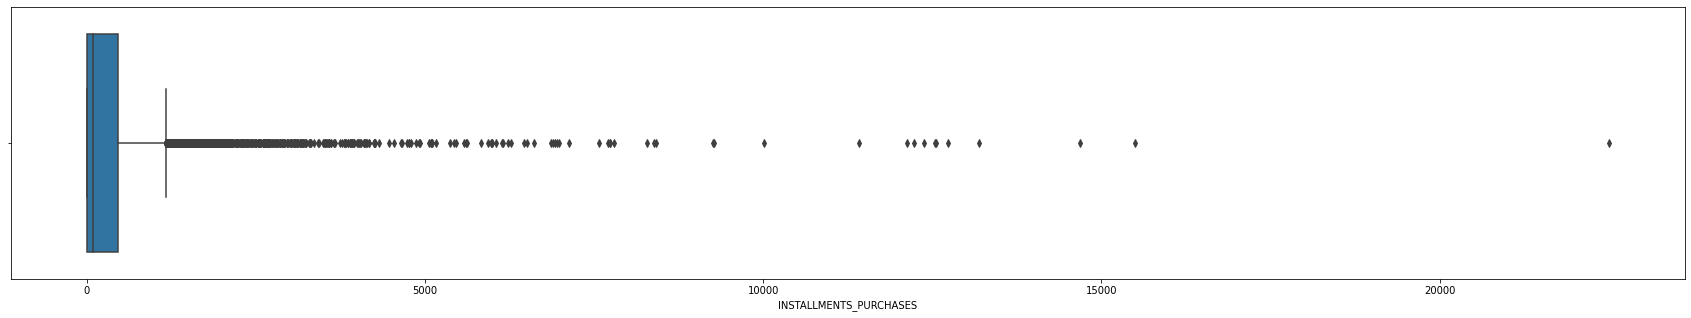

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


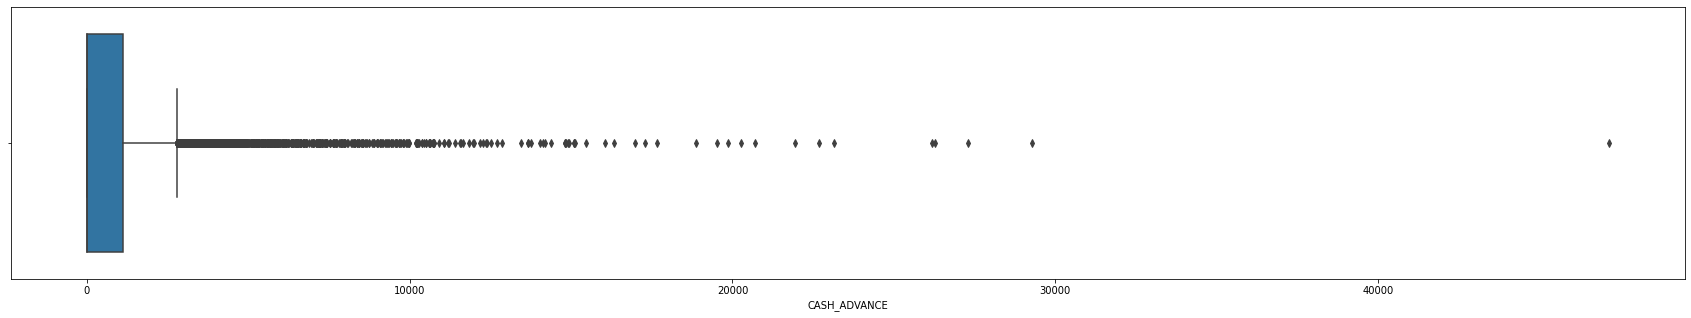

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


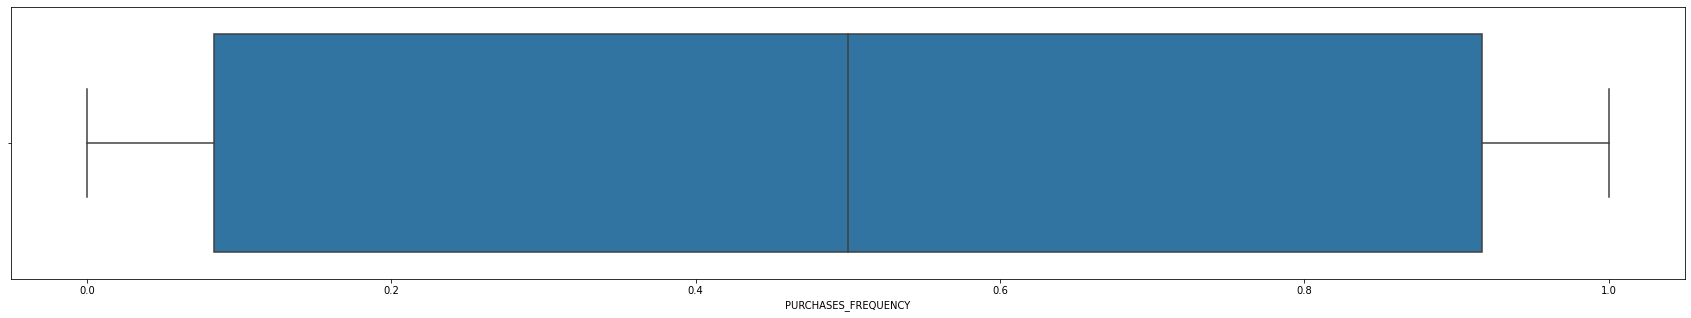

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


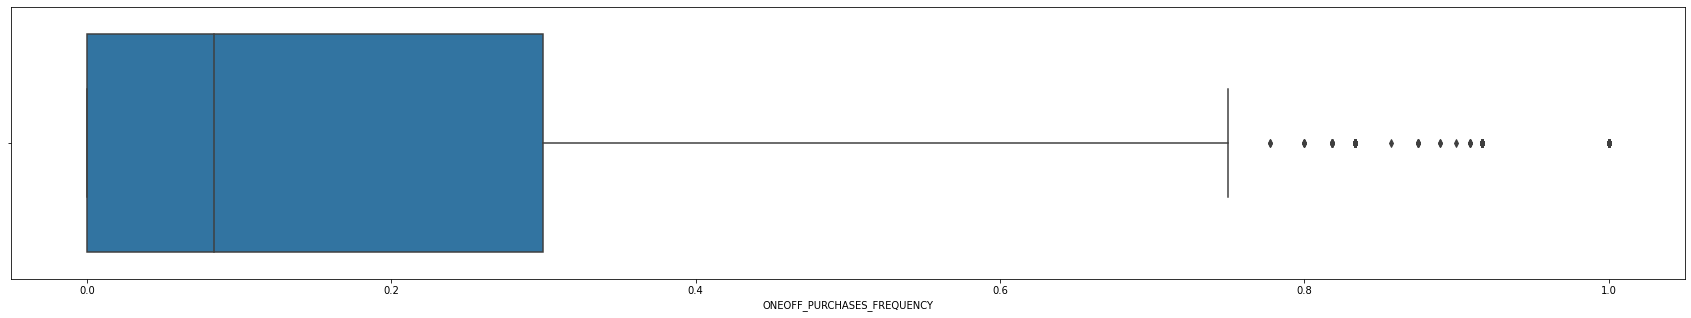

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


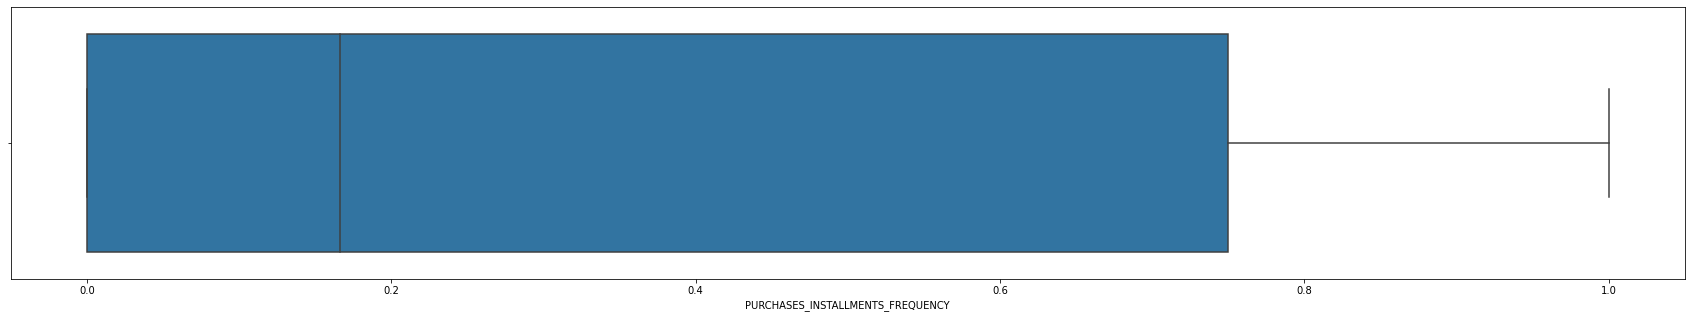

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


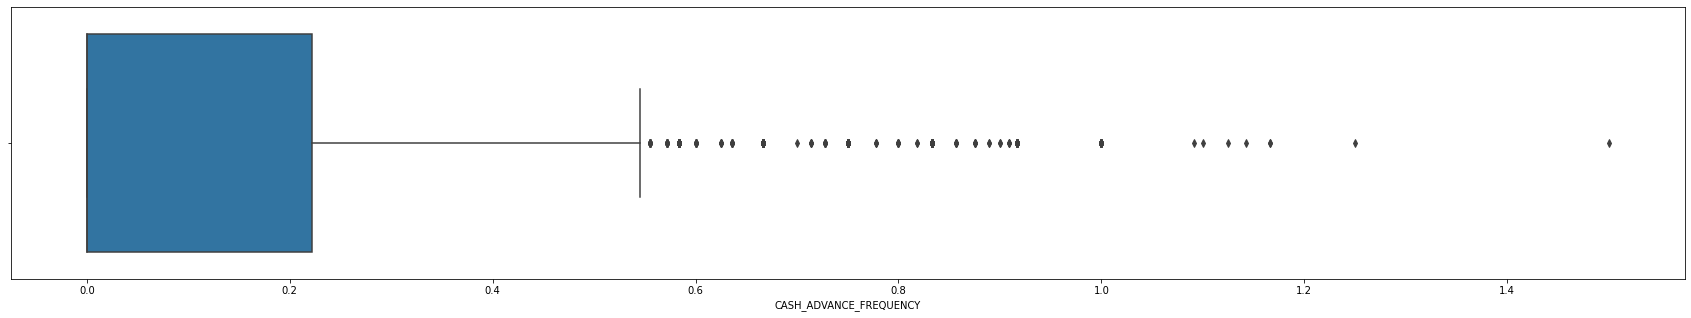

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


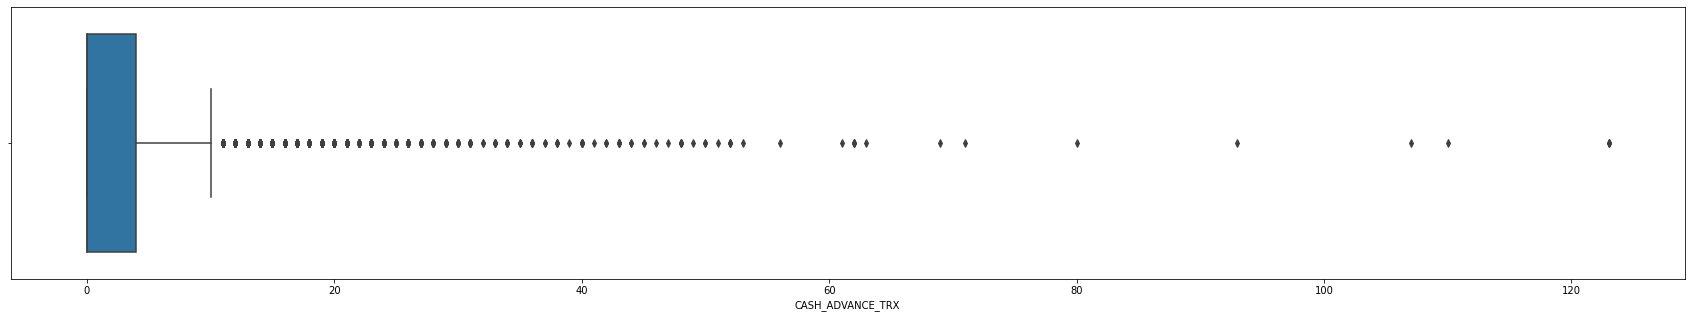

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


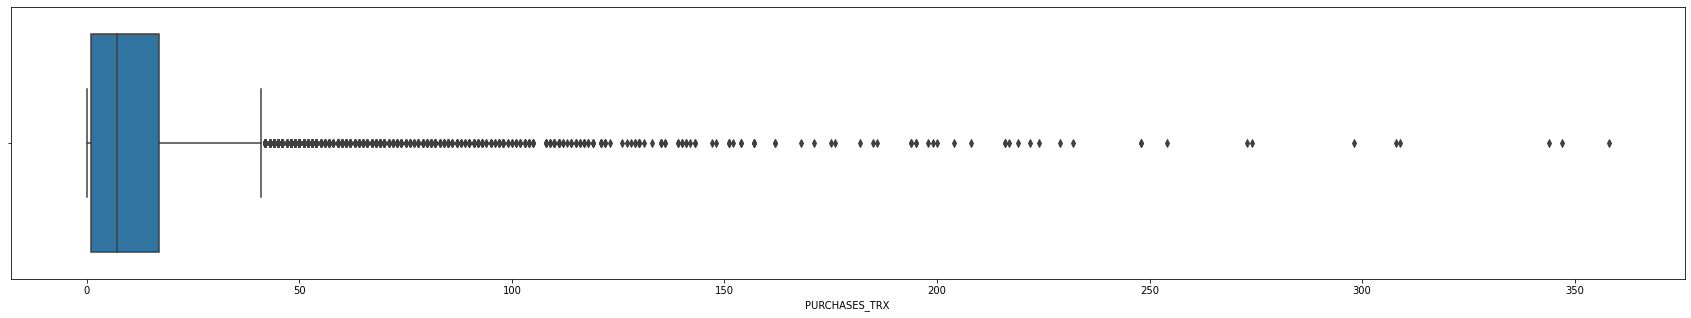

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


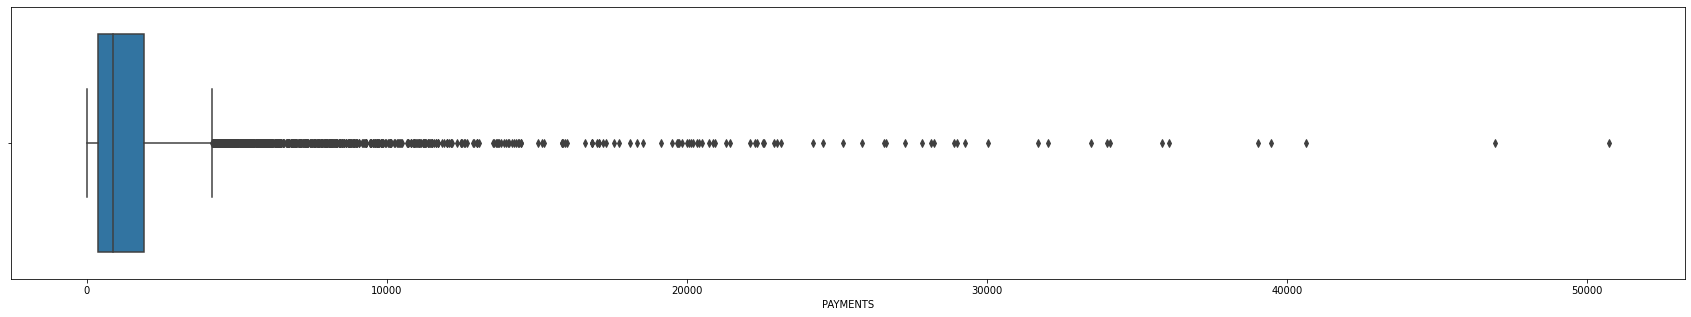

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


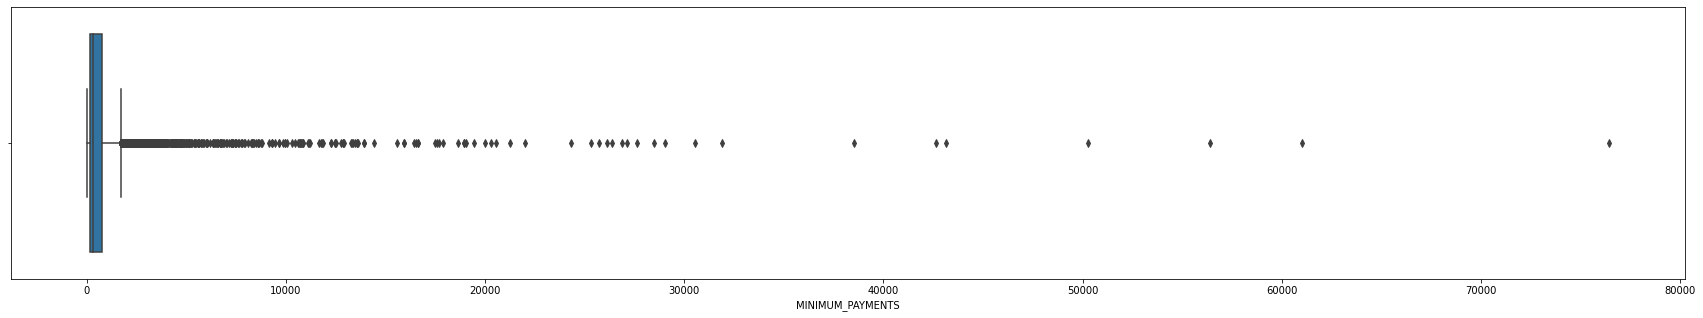

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


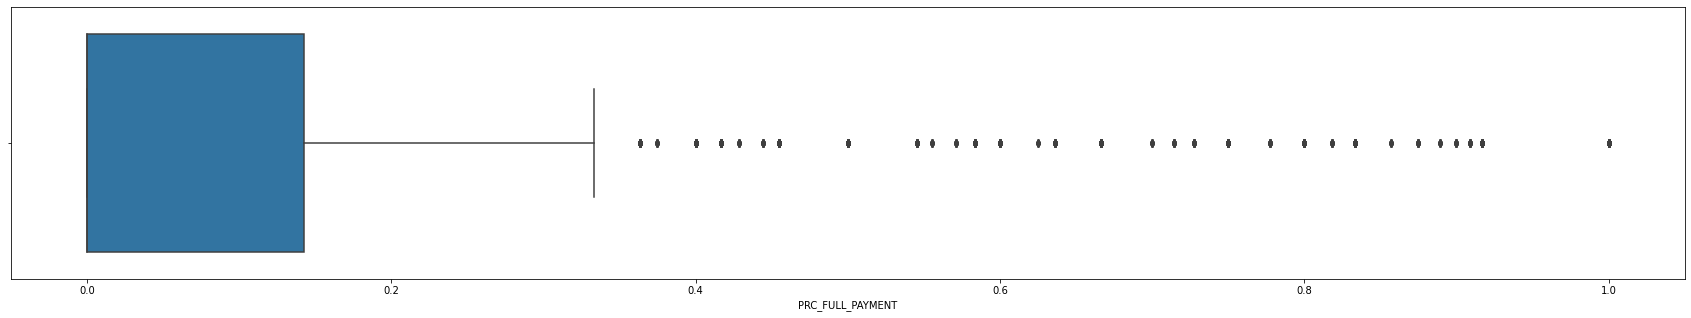

c:\Users\bamba\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


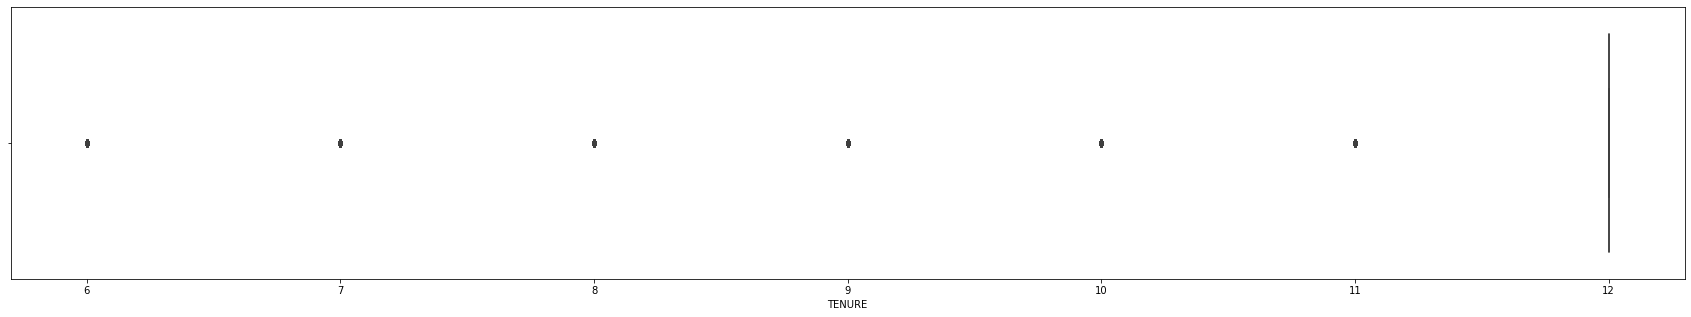

In [23]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()

#### 4.3 Pairplot

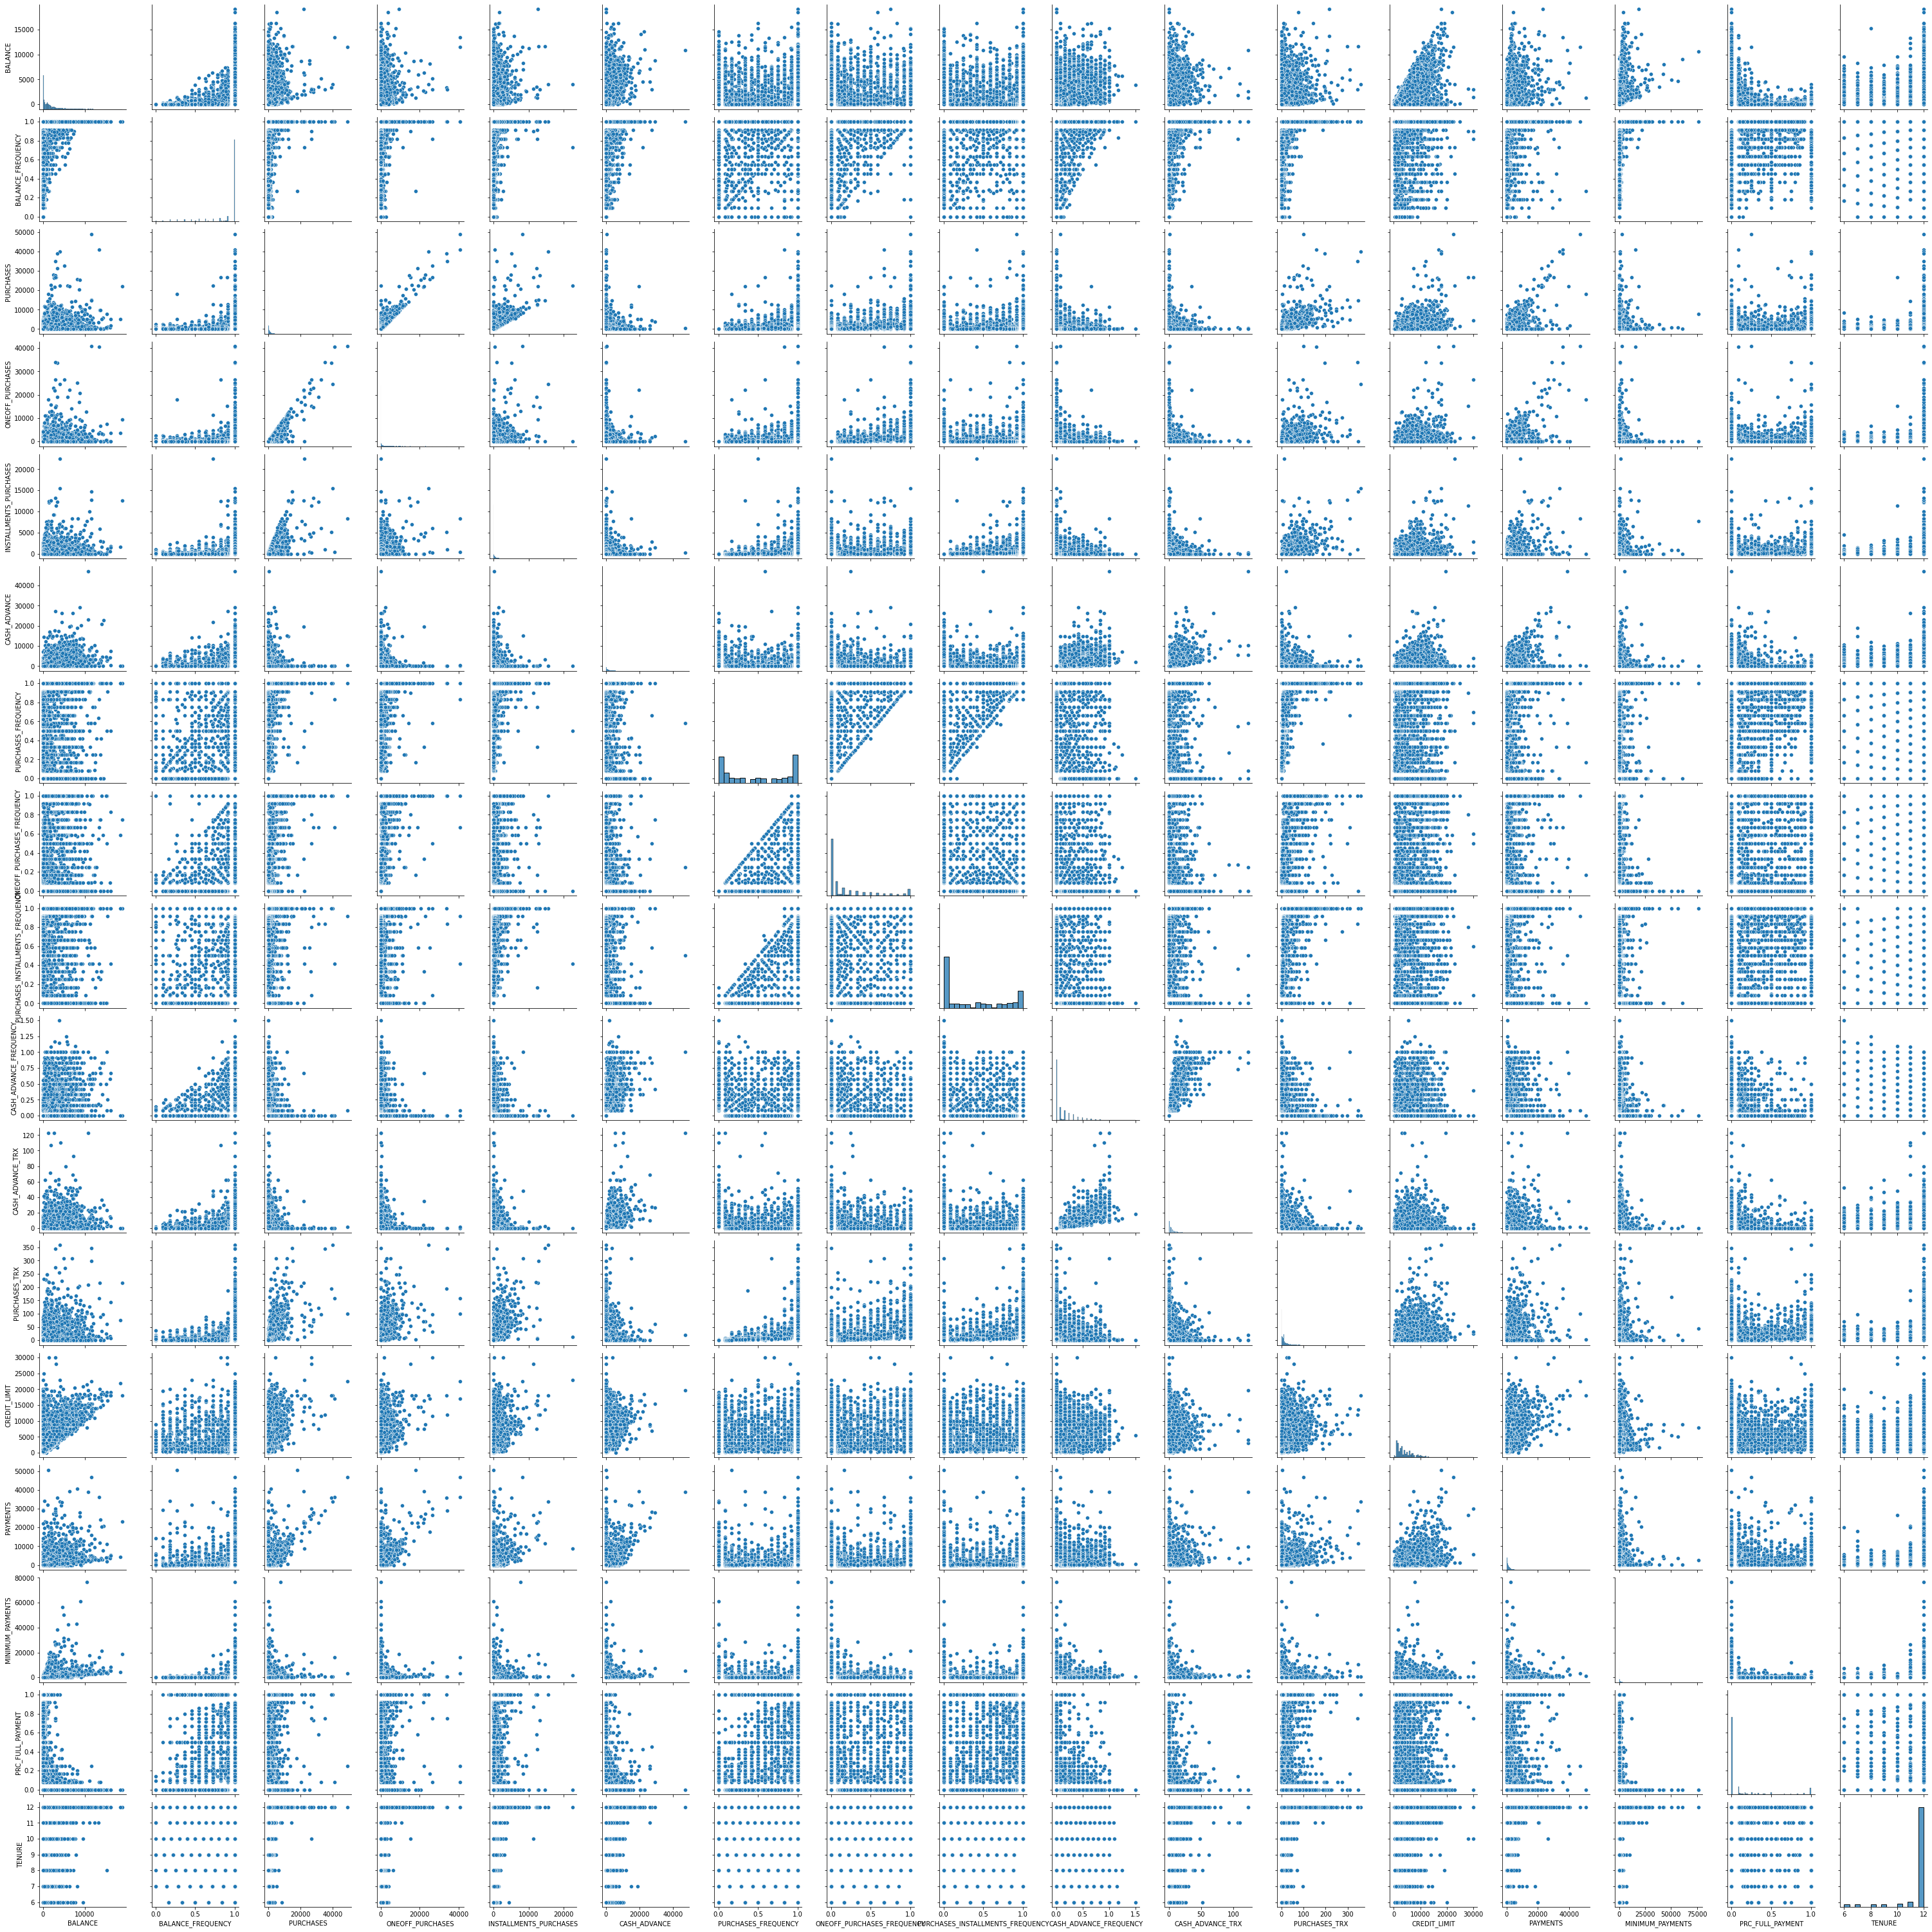

In [24]:
sns.pairplot(df)
plt.show()

#### 4.2 Heatmap

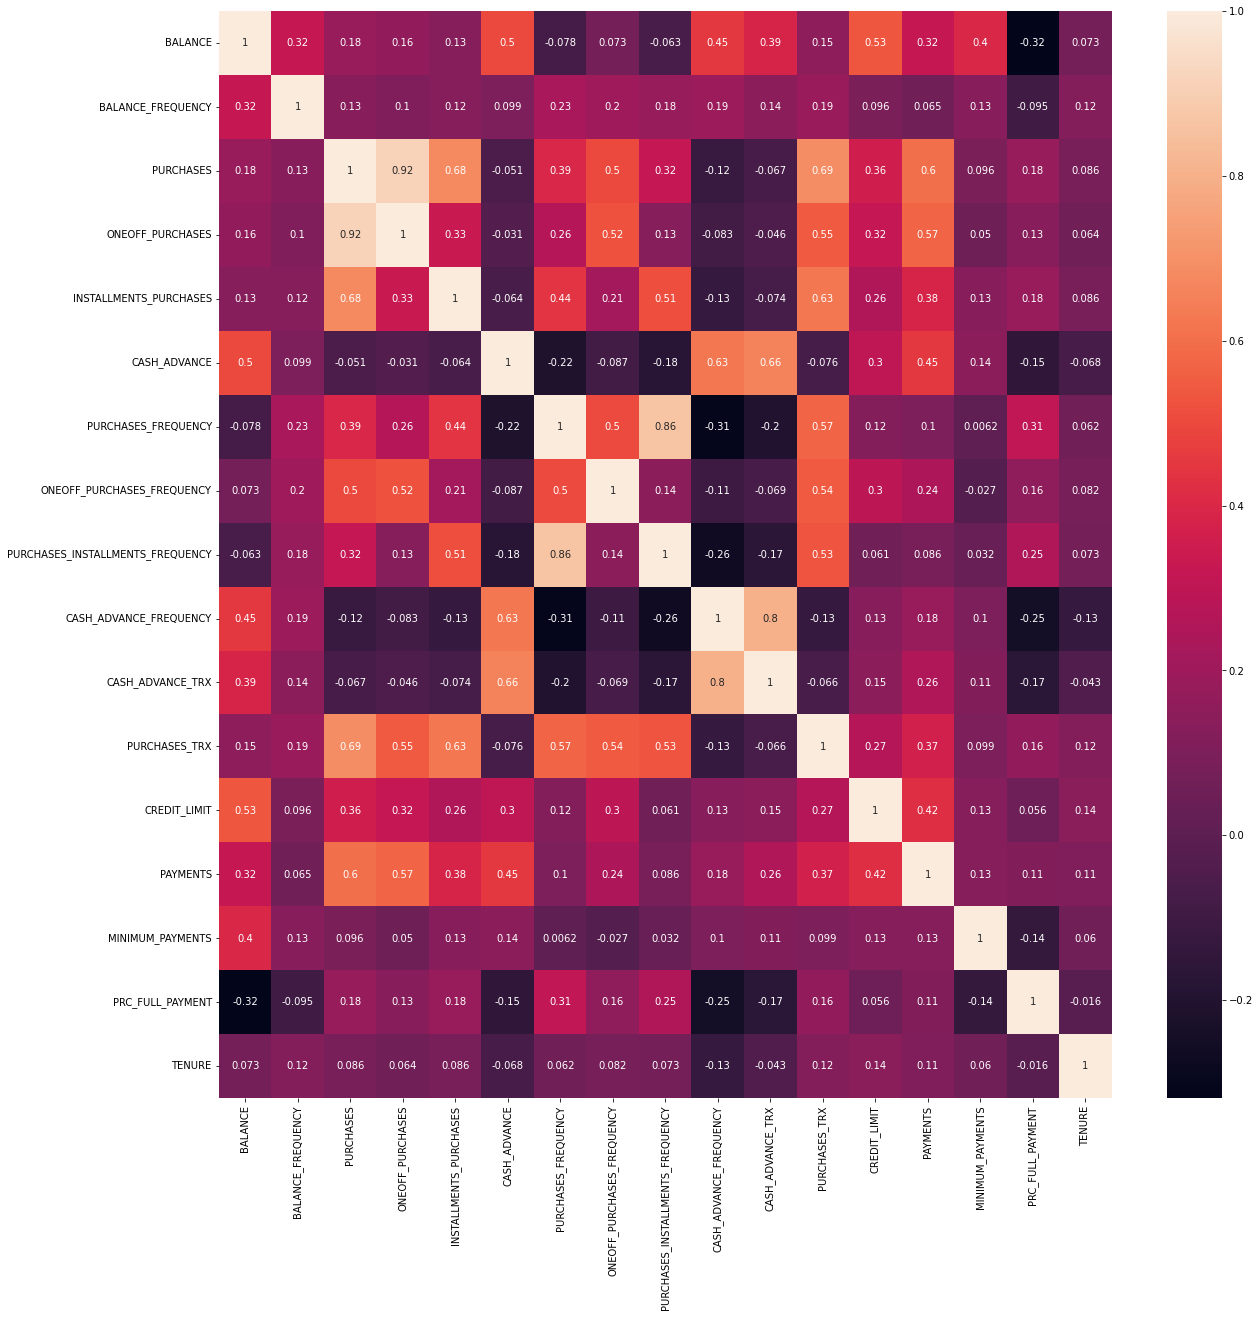

In [25]:
plt.figure(figsize=(20,20))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

## 5. Data Preparation

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


## 6. K-Means CLustering

In [9]:
new_df = pd.DataFrame(data_scaled, columns = df.columns)

In [10]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 8):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

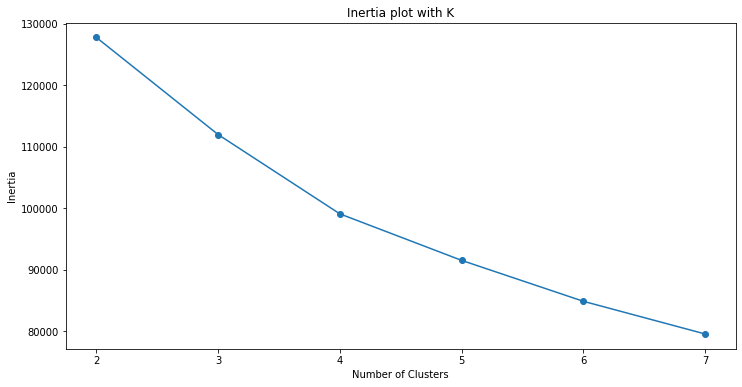

In [11]:
inertia_plot(KMeans, new_df)

dari plot diatas clusternya adalah 4

In [38]:
import matplotlib as cm

## 7.PCA

Text(0, 0.5, 'PC2')

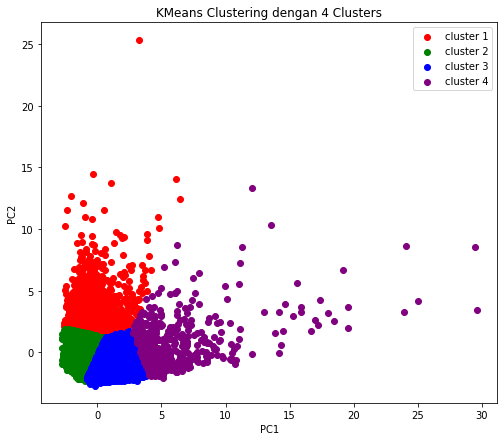

In [30]:
y_kmeans = pd.DataFrame(PCA(n_components = 2).fit_transform(new_df))
pred = pd.Series(KMeans(n_clusters = 4,).fit_predict(y_kmeans))
y_kmeans = pd.concat([y_kmeans, pred], axis =1)
y_kmeans.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple',]
plt.subplot(122)
plt.scatter(y_kmeans[y_kmeans['target']==0].iloc[:,0], y_kmeans[y_kmeans.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(y_kmeans[y_kmeans['target']==1].iloc[:,0], y_kmeans[y_kmeans.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(y_kmeans[y_kmeans['target']==2].iloc[:,0], y_kmeans[y_kmeans.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(y_kmeans[y_kmeans['target']==3].iloc[:,0], y_kmeans[y_kmeans.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('KMeans Clustering dengan 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Agglomerative Hierarchical Clustering dengan PCA

Text(0, 0.5, 'PC2')

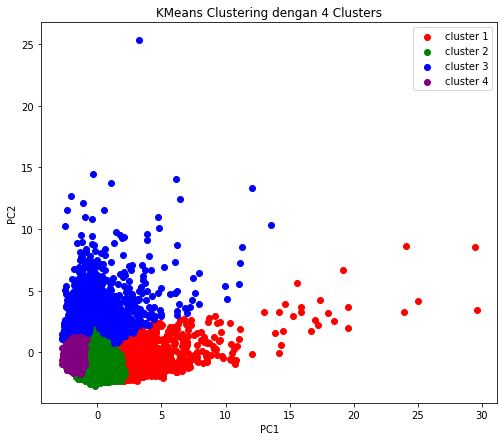

In [29]:
y_kmeans = pd.DataFrame(PCA(n_components = 2).fit_transform(new_df))
pred = pd.Series(AgglomerativeClustering(n_clusters = 4,).fit_predict(y_kmeans))
y_kmeans = pd.concat([y_kmeans, pred], axis =1)
y_kmeans.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple',]
plt.subplot(122)
plt.scatter(y_kmeans[y_kmeans['target']==0].iloc[:,0], y_kmeans[y_kmeans.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(y_kmeans[y_kmeans['target']==1].iloc[:,0], y_kmeans[y_kmeans.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(y_kmeans[y_kmeans['target']==2].iloc[:,0], y_kmeans[y_kmeans.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(y_kmeans[y_kmeans['target']==3].iloc[:,0], y_kmeans[y_kmeans.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('KMeans Clustering dengan 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## 8. Exploratory Data Analysis

In [13]:
# Sekarang kita memilih kolom untuk dianalisis
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# membuat dataframe terhadap 'cols'
data_cols = pd.DataFrame(new_df[cols])

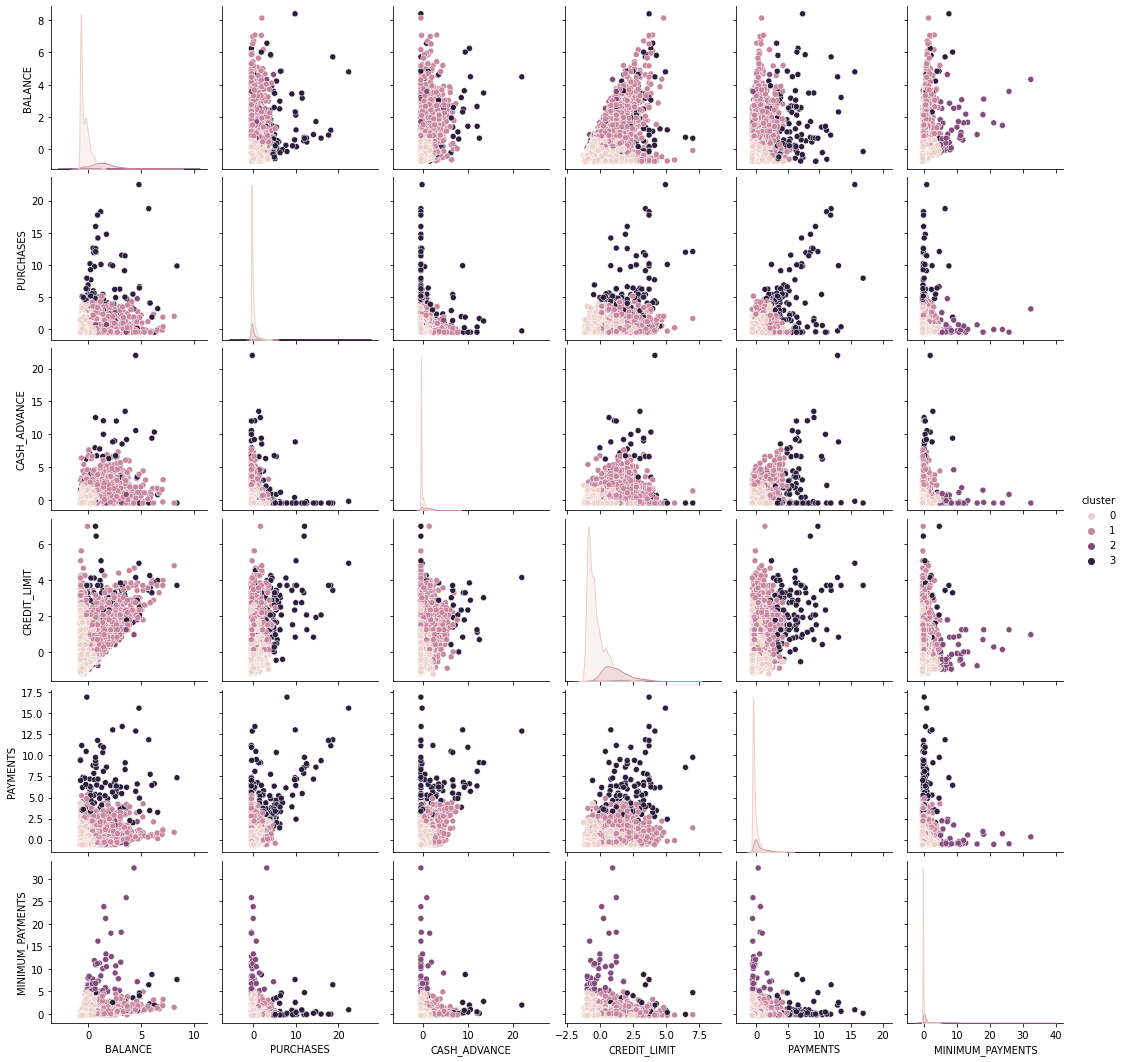

In [14]:
# apply KMeans clustering
alg = KMeans(n_clusters = 4)
label = alg.fit_predict(data_cols)

# create a 'cluster' column
data_cols['cluster'] = label
cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_cols[cols], hue='cluster')

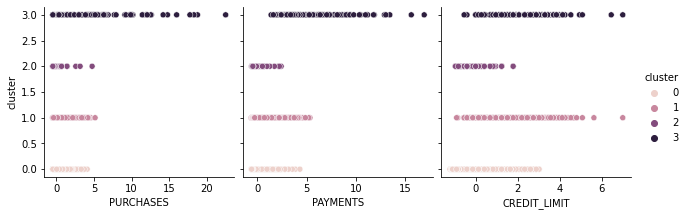

In [15]:
sns.pairplot(data_cols[cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=3, aspect=1)


#### CLuster 0 : jika dilihat tingkat pembeliannya rendah, payments juga cukup rendah, tetapi  batas kreditnya lebih tinggi
#### Cluster 1: Pada cluster 1 pembelian rendah, pembayaran rendah, batas credit tinggi
#### Cluster 2: Pada cluster 2 pembelian rendah seperti pada cluster 0 dan 1,  pembayaran lebih tinggi dari cluster 1 dan batas credit terendah 
#### Cluster 3: Pada cluster 3 pembelian tinggi, pembayaran tinggi, batas credit juga tinggi. Sepertinya ini termasuk kelompok yang tidak hemat/ boros


#### Sepertinya bank harus meningkatkan strategi pada cluster 0, 1 dan 2, terutama pada cluster 2

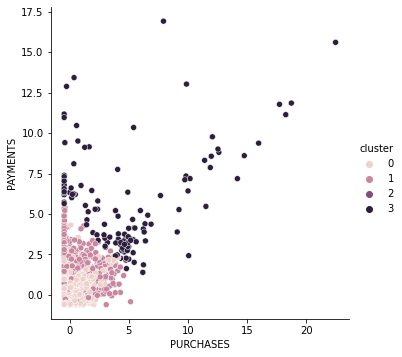

In [16]:
sns.pairplot(data_cols[cols], hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'],
            height=5, aspect=1)

### Kelompok peminjam uang

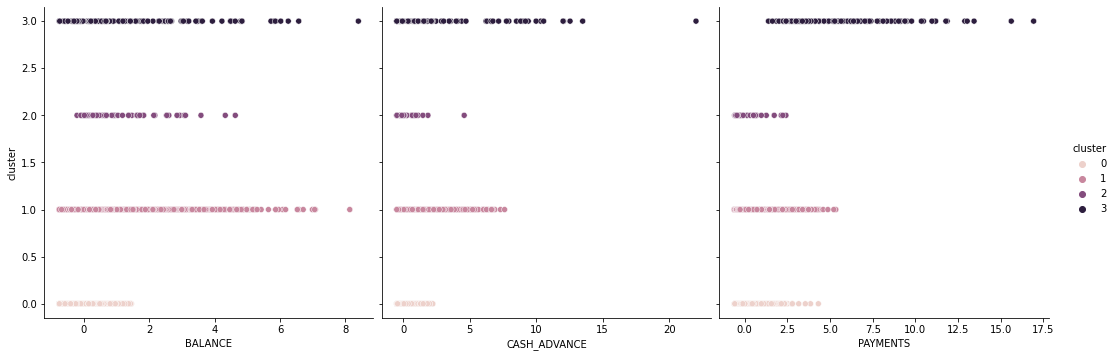

In [17]:
sns.pairplot(data_cols[cols], hue='cluster', x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'],
            height=5, aspect=1)

#### Pada cluster 3 Isi saldonya sangat bervariasi dan pada cluster ini adalah kelompok peminjam uang, dapat dilihat bahwa ada yang sampai lebih dari 20 poin, sedangkan pada pada cluster 1 dan 2 peminjam uangnya rendah.

## 9. Kesimpulan

dalam proyek ini, saya telah melakukan pra-pemrosesan data, ekstraksi fitur dengan PCA dan percobaan dnegan menggunakan algoritma KMeans Clustering, Agglomerative Hierarchical Clustering, dan data visualization. dari hasil clustering diatas dapat diketahui bahwa, cluster 0 tipe kelompok yang cukup hemat,cluster 1 yaitu kelompok peminjam uang yang, cluster 2 tipe kelompok yang rendah dalam minjam uang dan  pada cluster 3 adalah tipe kelompok peminjam uang
